# Integrantes
- Enzo Godoy 02211012
- Erik Pacheco 02211013
- Giovana Rodrigues 02211023
- Lucas Mesquita 02211044


## Imports

In [682]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Leitura

In [683]:
df = pd.read_csv('./Social_Network_Ads.csv')

## Segmentação para análise

In [684]:
purchased = df[df['Purchased'] == 1]
not_purchased = df[df['Purchased'] == 0]

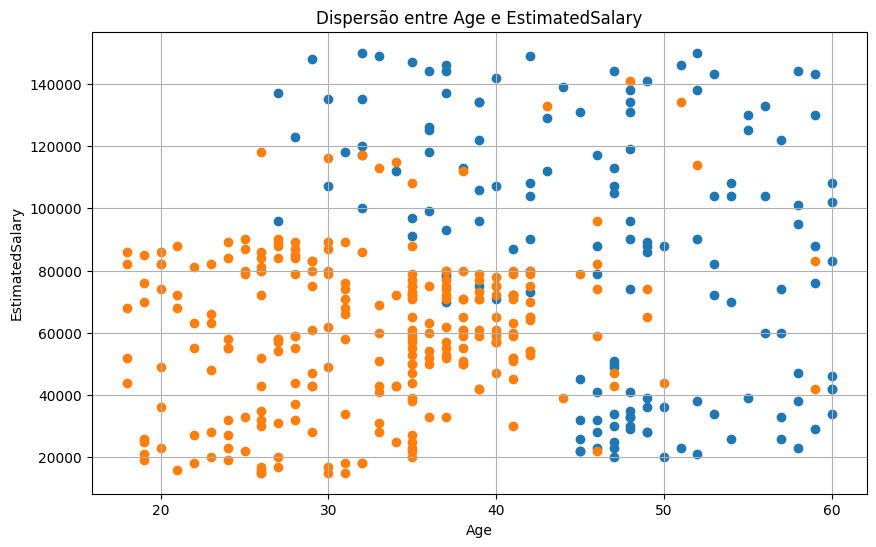

In [685]:
plt.figure(figsize=(10, 6))
plt.scatter(purchased['Age'], purchased['EstimatedSalary'])
plt.scatter(not_purchased['Age'], not_purchased['EstimatedSalary'])
plt.title('Dispersão entre Age e EstimatedSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.grid(True)
plt.show()


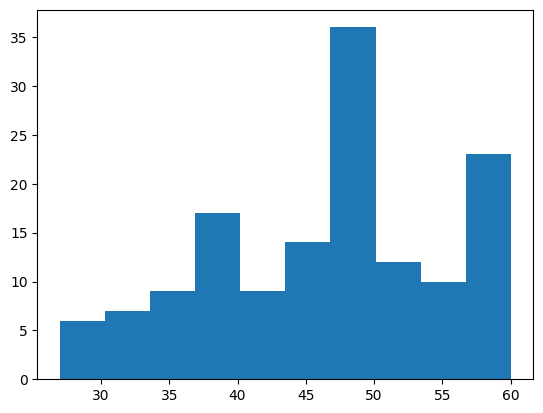

In [686]:
plt.hist(purchased['Age'])
plt.show()  

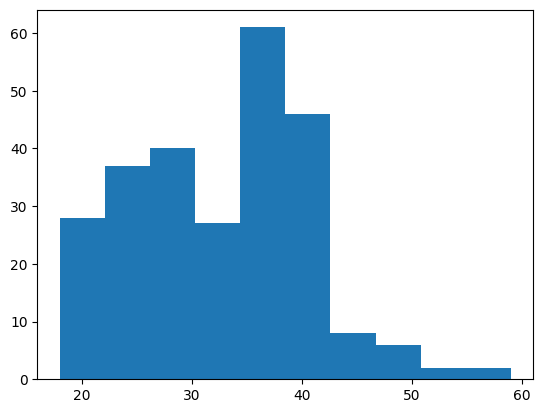

In [687]:
plt.hist(not_purchased['Age'])
plt.show()  

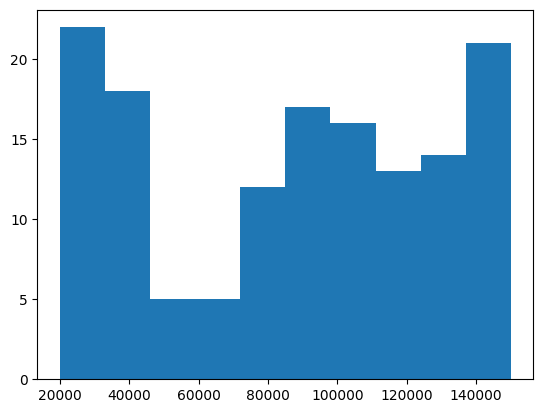

In [688]:
plt.hist(purchased['EstimatedSalary'])
plt.show()  

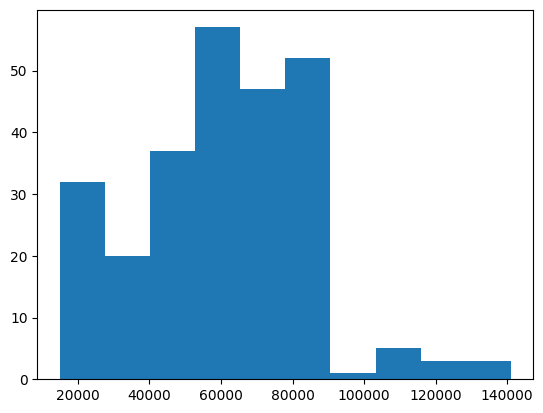

In [689]:
plt.hist(not_purchased['EstimatedSalary'])
plt.show()  

# Verificando Balanceamento de Classe

In [690]:
contagem_classes = df['Purchased'].value_counts()
print(contagem_classes)

Purchased
0    257
1    143
Name: count, dtype: int64


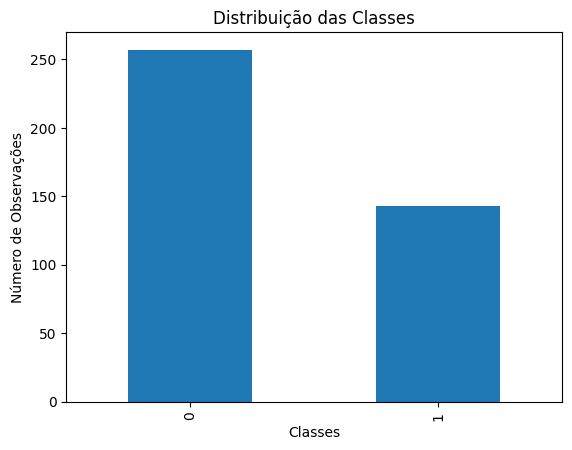

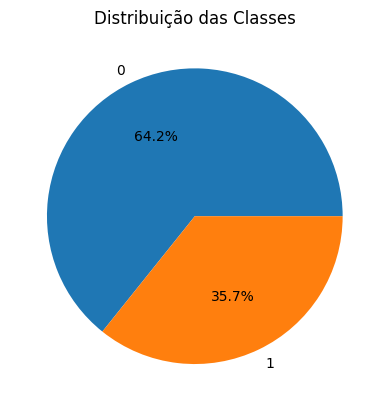

In [691]:
contagem_classes.plot(kind='bar')
plt.title('Distribuição das Classes')
plt.xlabel('Classes')
plt.ylabel('Número de Observações')
plt.show()

contagem_classes.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição das Classes')
plt.ylabel('')
plt.show()

## Distribuição das Caracteristicas

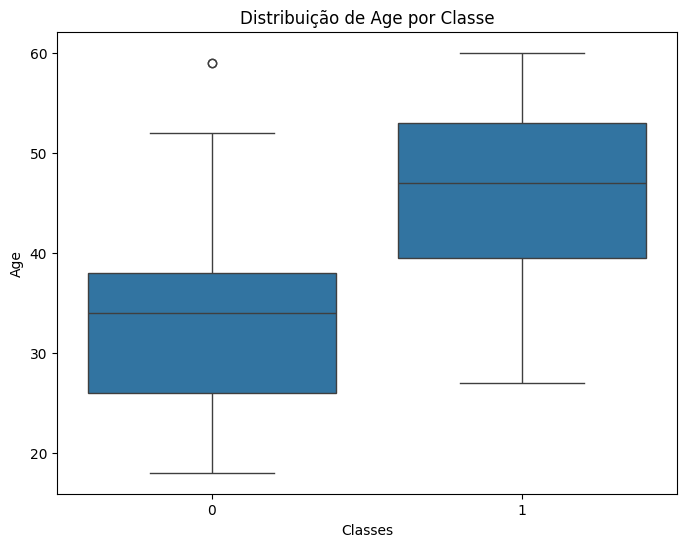

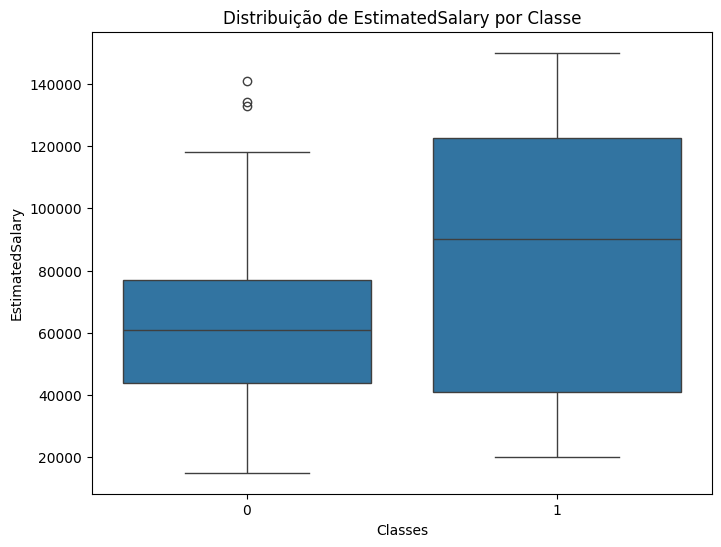

In [692]:
import seaborn as sns

for feature in df.columns:
    if feature != 'Purchased':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Purchased', y=feature, data=df)
        plt.title(f'Distribuição de {feature} por Classe')
        plt.xlabel('Classes')
        plt.ylabel(feature)
        plt.show()


## Correlação

In [693]:
correlacao = df.corr()['Purchased'].sort_values(ascending=False)
print(correlacao)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Name: Purchased, dtype: float64


## Escolha do Modelo

Com base nas análises realizadas acima, identificamos que existem duas classes que pretendemos classificar, sendo eles os valores 0 e 1 da coluna Purchased.

Identificamos que existe um desbalanceamento entre as duas classes, tendo um maior volume de 0's e que há uma correlação forte entre a idade e a nossa coluna target.

Sendo assim mais propício utilizarmos um modelo de classificação.

## Modelo

In [694]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [695]:
x_train, x_test, y_train, y_test = train_test_split(x,
y, test_size = 0.2, random_state = 0)

In [696]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

## Medindo Performance

In [697]:
score = classifier.score(x_test, y_test)
print(score)

0.9125


In [698]:
# Matriz de confusão
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Relatório de classificação
classif_report = classification_report(y_test, y_pred)
print(classif_report)

[[54  4]
 [ 3 19]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.83      0.86      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.91      0.91      0.91        80



## Desenvolvendo modelo de Regressão

Removendo coluna de Salário estimado.

In [699]:
reg_x = df.iloc[:, :1].values
reg_y = df.iloc[:, -1].values

In [700]:
reg_x_train, reg_x_test, reg_y_train, reg_y_test = train_test_split(reg_x,
reg_y, test_size = 0.2, random_state = 0)

In [701]:
regressor = LinearRegression()
regressor.fit(reg_x_train, reg_y_train)
reg_y_pred = regressor.predict(reg_x_test)

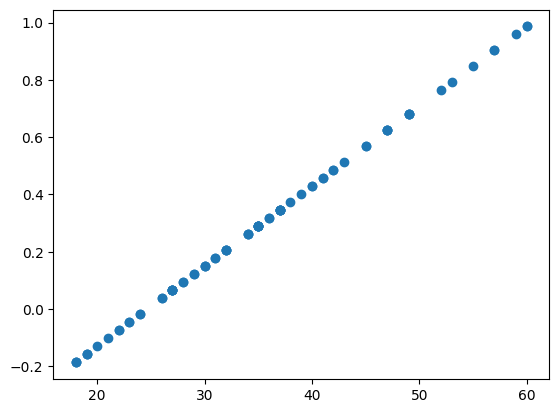

In [702]:
plt.scatter(reg_x_test, reg_y_pred)
plt.show()

In [703]:
r2 = r2_score(reg_y_test, reg_y_pred)
r2

0.5324014007760229

## Mau desempenho com modelo de regressão

Neste modelo de regressão, testamos colocar somente a dimensão que tem um maior indice de correlação (Age), mas de acordo com o valor do R2, o modelo obteve valores ainda piores do que o modelo de classificação